## Risk Tolerance

Risk tolerance of an investor is one of the most important inputs to the portfolio allocation and rebalancing steps of the portfolio management process.In most of the cases, the risk tolerance of an investor is decided based on a risk tolerance questionnaire. Several studies have shown that these risk tolerance questionnaires are prone to error, as **investors suffer from behavioral biases and are poor judges of their own risk perception**. Thus the goal of this case study is to build a supervised regression–based model to predict the risk tolerance of an investor. We then build a robo-advisor dashboard in Python and implement the risk tolerance prediction model in the dashboard.

The predicted variable is the “true” risk tolerance of an individual, and the predictor variables are demographic, financial, and behavioral attributes of an individual. The data used for this case study is from the *Survey of Consumer Finances (SCF)*, which is conducted by the Federal Reserve Board. The survey includes responses about household demographics, net worth, financial, and nonfinancial assets for the same set of individuals in 2007 (precrisis) and 2009 (postcrisis). This enables us to see how each household’s allocation changed after the 2008 global financial crisis.

#### Loading the data

In [57]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# pip install openpyxl
# Can take a while
dataset = pd.read_excel('./data/risk_tolerance/SCFP2009panel.xlsx')

In [58]:
dataset.describe()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
count,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,...,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,19285.0
mean,2222.613689,22229.136894,5868.854779,51.647654,3.228157,14.072855,3.055535,1.314752,0.876588,3.792585,...,9.768241e+05,7.842138e+05,5.230099e+05,1.513447e+05,4.315485e+05,2.546299e+05,3.037898e+05,5.416303e+05,4.306108e+05,57.0
std,1275.293152,12752.931600,3881.525292,15.662512,1.494929,2.733539,1.055146,0.464429,1.200590,1.598757,...,1.142686e+07,1.869723e+07,1.360353e+07,5.184665e+06,3.384363e+07,4.677663e+06,3.916706e+06,2.036640e+07,2.116043e+07,0.0
min,1.000000,11.000000,0.885319,19.000000,1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,...,-1.000000e+02,-1.000000e+02,-1.016805e+08,-2.603585e+02,-9.962049e+07,-1.000000e+02,-8.168880e+06,-1.009656e+02,-1.000000e+02,57.0
25%,1130.000000,11302.000000,1992.217143,40.000000,2.000000,12.000000,2.000000,1.000000,0.000000,3.000000,...,-5.405405e+00,-2.115196e+01,-6.457549e+00,-2.867388e+01,0.000000e+00,0.000000e+00,0.000000e+00,-3.562493e+01,-2.584808e+01,57.0
50%,2233.000000,22333.000000,6756.245225,51.000000,3.000000,14.000000,3.000000,1.000000,0.000000,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.794657e+01,0.000000e+00,57.0
75%,3323.000000,33234.000000,8538.990444,62.000000,4.000000,16.000000,4.000000,2.000000,2.000000,5.000000,...,0.000000e+00,1.692806e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.225191e+02,6.344615e+01,57.0
max,4423.000000,44235.000000,17895.936632,95.000000,6.000000,17.000000,4.000000,2.000000,10.000000,6.000000,...,5.000000e+08,1.095825e+09,7.471537e+08,3.094213e+08,1.870849e+09,2.717647e+08,1.225332e+08,8.860001e+08,1.721023e+09,57.0


### Data preparation and feature selection

We prepare the predicted variable, which is the "true" risk tolerance in the following steps. There are different ways of getting the "true" risk tolerance. The idea and the purpose of this case study is to come up with an approach to solve the behavioral finance problem using machine learning.

The steps to compute the predicted variables are as follows:

Compute the Risky asset and the riskless assets for all the individuals in the survey data. Risky and riskless assets are defined as follows:
- Risky assets is investments in mutual funds, stocks, bonds, commodities, and real estate, and an estimate of human capital.
- Risk Free Assets: checking and savings balances,certificates of deposit, and other cash balances and equivalents.

Then we take the ratio of risky assets to total assets of an investor and consider that as a measure of risk tolerance of an investor. From the data of SCF, we have the data of risky and riskless assets for the individuals for 2007 and 2009. We use this data and normalise the risky assets with the stock price of 2007 vs. 2009 to get risk tolerance.
- Risk Tolerance just defined as the ratio of Risky Asset to Riskless Assets normalised with the average S&P500 of 2007 vs 2009. Average S&P500 in 2007: 1478 Average S&P500 in 2009: 948


In a lot of literature, an intelligent investor is the one who doesn't change its risk tolerance during the change in the market. So, we consider the investors who change their risk tolerance by less than 10% between 2007 and 2009 as the intelligent investors. Ofcourse this is a qualitative judgement and is subject to change. However, as mentioned before more than being accurate and precise the purpose of theis case study is to demonstrate the usage of the machine learning and provide a machine learning based framework in behavioral finance and portfolio management which can be further leveraged for more detailed analysis.

In [59]:
#Average SP500 during 2007 and 2009
Average_SP500_2007=1478
Average_SP500_2009=948

#Risk Tolerance 2007
# Risk-free: liquidity + certificate deposit + saving bonds + cash
# Risk: mutual founds + stock + bond
# Risk tolerance: Risk/(Risk-free + Risk)
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

#Risk Tolerance 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

Compute the percentage change in risk tolerance between 2007 and 2009:

In [60]:
dataset['PercentageChange'] = np.abs(dataset['RT09']/dataset['RT07']-1)

In [61]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [62]:
# Drop the rows containing NA
dataset=dataset.dropna(axis=0)

dataset=dataset[~dataset.isin([np.inf, -np.inf]).any(axis=1)]

#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Let us investigate the risk tolerance behavior of individuals in 2007 versus 2009. Looking at the risk tolerance of 2007, we see that a significant number of individuals had risk tolerance close to one. Meaning the investment was more skewed towards the risky assets as compared to the riskless assets.

Remember 0 -> low risks tolerance (will to take less risks), meanwhile 1 -> high risks tolerance (will to take more risks).

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Risk tolerance in 2007')]

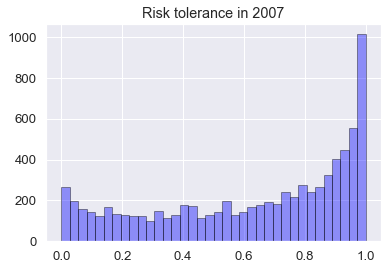

In [78]:
import seaborn as sns
sns.set(font_scale=1.2)
# sns.distplot will be removed in seaborn 0.14.0 -> check the version (use sns.displot instead)
sns.distplot(dataset['RT07'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}).set(xlabel=None, title='Risk tolerance in 2007')

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Risk tolerance in 2009')]

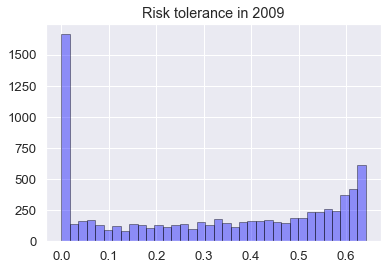

In [79]:
sns.distplot(dataset['RT09'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}).set(xlabel=None, title='Risk tolerance in 2009')

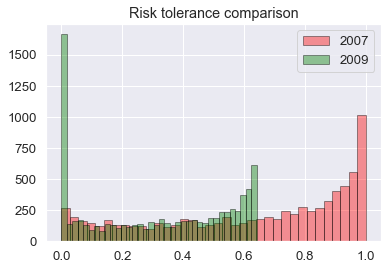

In [80]:
sns.distplot(dataset['RT07'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', label='2007',
             hist_kws={'edgecolor':'black'})

sns.distplot(dataset['RT09'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', label ='2009',
             hist_kws={'edgecolor':'black'}).set(xlabel=None, title='Risk tolerance comparison')
plt.legend()

The behavior of the individuals reversed in 2009 after crisis and majority of the investment was in risk free assets. Overall risk tolerance decreased, which is shown by majority of risk tolerance being close to 0 in 2009.

Now we select the intelligent investors. They are selected as the one with a change in risk tolerance between 2007 and 2009 less than 10%.

In [81]:
dataset3 = dataset[dataset['PercentageChange']<=.1]

We assign the true risk tolerance as the average risk tolerance of these intelligent investors between 2007 and 2009. This is the predicted variable for this case study. The purpose would be to predict the true risk tolerance of an individuals given the demographic, financial and willingness to take risk related features.

In [83]:
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2
# Drop some columns that are no more needed for the prediction
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

### Feature selection
Looking at the entire data, we have more than 500 features in the dataset. However, academic literature and industry practice indicate risk tolerance is heavily influenced by investor demographic, financial, and behavioral attributes, such as age, current income, net worth, and willingness to take risk. All these attributes were available in the dataset and are summarized in the following section. These attributes are used as features to predict investors’ risk tolerance.

In order to filter the features further we do the following:

Check the description in the Data Dictionary (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt)and only keep the features that are intuitive The description is as follows:
- AGE: There are 6 age categories, where 1 represents age less than 35 and 6 represents age more than 75.
- EDUC: There are 4 education categories, where 1 represents no high school and 4 represents college degree.
- MARRIED: It represents marital status. There are two categories where 1 represents married and 2 represents unmarried.
- OCCU: It represents occupation category. 1 represents managerial category and 4 represents unemployed.
- KIDS: It represents number of children.
- NWCAT: It represents net worth category. There are 5 categories, where 1 net worth less than 25 percentile and 5 represents net worth more than 90th percentile.
- INCCL: It represents income category. There are 5 categories, where 1 income less than 10,000 and 5 represents net worth more than 100,000
- RISK: It represents the willingness to take risk on a scale of 1 to 4, where 1 represents highest level of willingness to take risk.

Keep only the intuitive factors as of 2007 only and remove all the intermediate features and features related to 2009, as the variables of 2007 are the only ones required for predicting the risk tolerance.

In [85]:
keep_list = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance'
]

drop_list = [col for col in dataset3.columns if col not in keep_list]

dataset3.drop(labels=drop_list, axis=1, inplace=True)

<Axes: title={'center': 'Correlation Matrix'}>

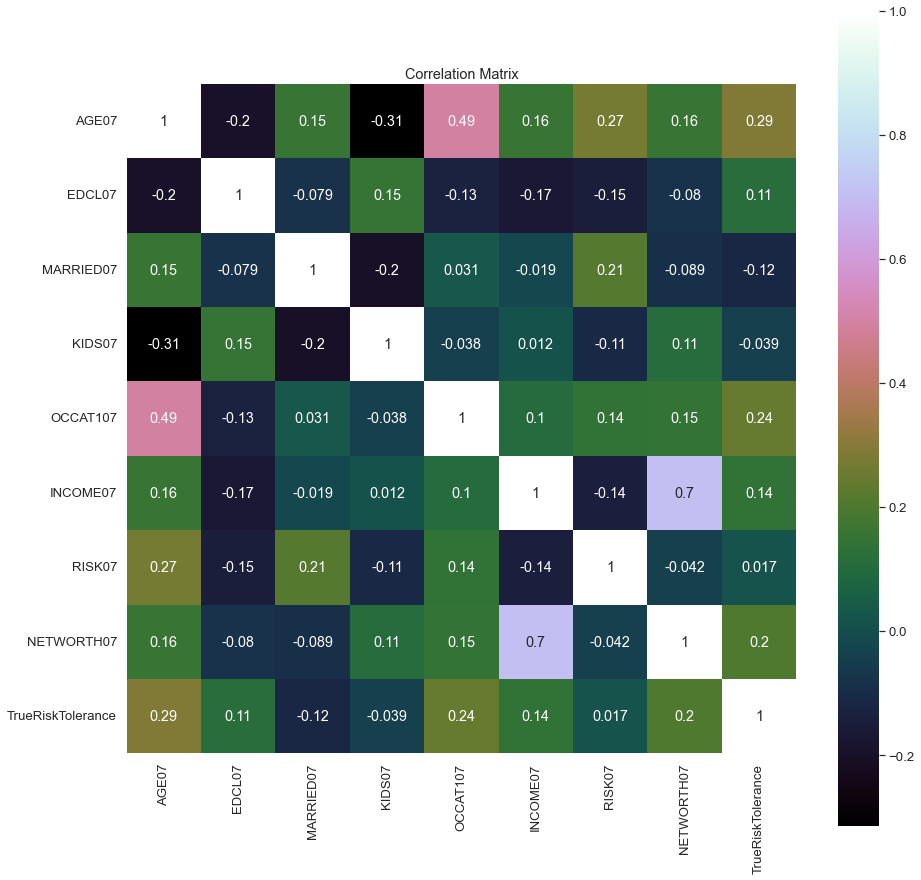

In [86]:
# Correlation matrix
correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation chart net worth and income are positively correlated with risk tolerance. With a greater number of kids and marriage, risk tolerance decreases. With age there is a positive relationship of the risk tolerance (you can read https://www.researchgate.net/publication/228980285_Does_Risk_Tolerance_Decrease_With_Age).

### Evaluate the models

In [93]:
from sklearn.model_selection import train_test_split
# split out validation dataset for the end
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# k-fold parameter
num_folds = 10
#scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
scoring = 'r2'

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K-fold crossvalidation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    # The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.316779 (1.138804)
LASSO: 0.630952 (1.835493)
EN: 0.584683 (1.788157)
KNN: -0.375004 (0.196166)
CART: -0.624751 (0.176067)
SVR: -0.122859 (0.177593)
ABR: -0.427504 (0.053005)
GBR: -0.681230 (0.123356)
RFR: -0.743868 (0.089102)
ETR: -0.751818 (0.145609)


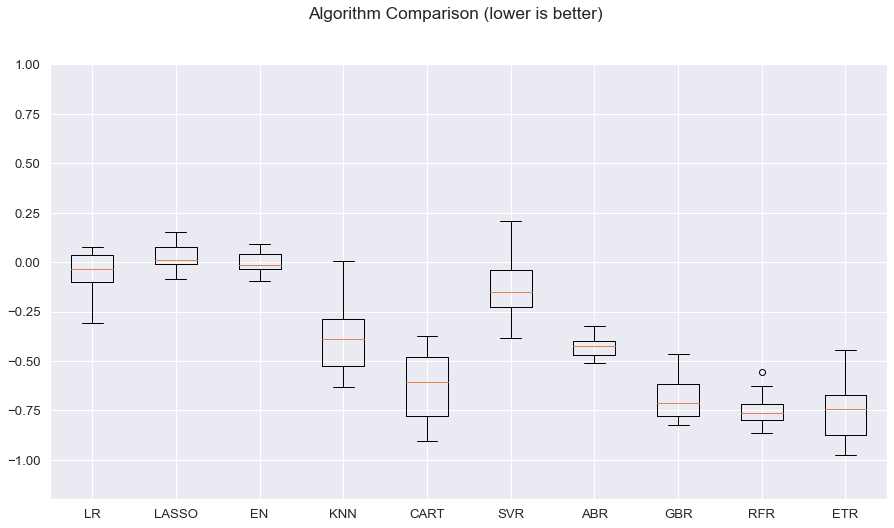

In [100]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison (lower is better)')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylim([-1.2,1])
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

The nonlinear models perform better than the linear models, which means that there is a nonlinear relationship between the risk tolerance and the variables used to predict it. Given random forest regression is one of the best methods, we use it for further grid search.

### Model tuning and grid search

In [104]:
from sklearn.model_selection import GridSearchCV
# Grid search : RandomForestRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

best_param = list(grid_result.best_params_.values())[0]

0.731386 (0.102219) with: {'n_estimators': 50}
0.725755 (0.097525) with: {'n_estimators': 100}
0.737082 (0.090330) with: {'n_estimators': 150}
0.733760 (0.096630) with: {'n_estimators': 200}
0.733310 (0.099929) with: {'n_estimators': 250}
0.735485 (0.096110) with: {'n_estimators': 300}
0.733425 (0.098738) with: {'n_estimators': 350}
0.736901 (0.095834) with: {'n_estimators': 400}
Best: 0.737082 using {'n_estimators': 150}


### Finalize the model

In [116]:
# Prepare model
model = RandomForestRegressor(n_estimators = best_param)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150)

In [120]:
from sklearn.metrics import r2_score
predictions_train = model.predict(X_train)
print("Train set R2 performance: " + str(r2_score(Y_train, predictions_train)))

Train set R2 performance: 0.9645777361553343


In [121]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print("Test set performances: ")
print("MSE: "+str(mean_squared_error(Y_validation, predictions)))
print("R2: "+ str(r2_score(Y_validation, predictions)))

Test set performances: 
MSE: 0.008409833063431123
R2: 0.7134936153954065


From the mean square error and R2 shown above for the test set, the random forest results look good.
#### Feature importance

[0.1980715  0.02318341 0.01264543 0.0500222  0.02475188 0.22560117
 0.05966166 0.40606275]


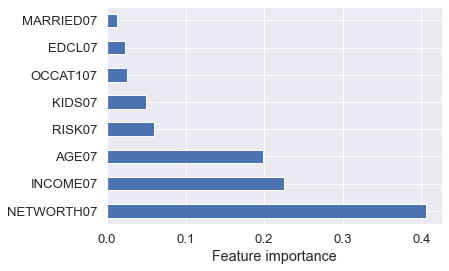

In [123]:
# Feature importance of the Random Forest model
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Feature importance")
plt.show()

Income and networth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.

### Save the model for later use

In [124]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

### How to load it back

In [125]:
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
predictions = loaded_model.predict(X_validation)

0.7203779604646228
0.008207756614548256


We showed that machine learning models might be able to objectively analyze the behavior of different investors in a changing market and attribute these changes to variables involved in determining risk appetite.